In [2]:
import ROOT as R

Welcome to JupyROOT 6.24/06


In [11]:
f_emp = R.TFile('/Users/cheng/WorkRun4/data/nominal_fit/Run4U_empirical_nominal.root')
output_dir = '/Users/cheng/workspace/Data/Run4U/nominal_fit'

raw = f_emp.Get('topDir/Iter0/RawHists/RawHist/rawTimesAndEnergies').Clone()
pu_d = f_emp.Get('topDir/Iter0/EmpiricalPileupHists/Added/addedPileupTimesAndEnergies_1stOrder').Clone()
pu_t = f_emp.Get('topDir/Iter0/EmpiricalPileupHists/Added/addedPileupTimesAndEnergies_2ndOrder').Clone()

corr_all = raw.Clone()
corr_all.Add(pu_d,-1)
corr_all.Add(pu_t,-1)

hists_calos = []

for n in range(1,25):
    raw = f_emp.Get('topDir/Iter0/RawHists/caloRawHists/caloRawTimesAndEnergies_Calo%s'%(n)).Clone()
    pu_d = f_emp.Get('topDir/Iter0/EmpiricalPileupHists/Calos/Calo%s/caloPileupTimesAndEnergies_1stOrder'%(n)).Clone()
    pu_t = f_emp.Get('topDir/Iter0/EmpiricalPileupHists/Calos/Calo%s/caloPileupTimesAndEnergies_2ndOrder'%(n)).Clone()
    corr = raw.Clone()
    corr.Add(pu_d,-1)
    corr.Add(pu_t,-1)
    hists_calos.append(corr)

In [13]:
# wiggles for T-method threshold scan
print (corr_all.GetYaxis().GetBinWidth(1))
print (corr_all.GetYaxis().FindBin(1700))

ebin_end = corr_all.GetYaxis().FindBin(3100)-1
wiggles = []
for n in range(1200,2200,50):
    ebin_start = corr_all.GetYaxis().FindBin(n)
    wiggle = corr_all.ProjectionX('wiggle_thres%s'%(n),ebin_start,ebin_end)
    wiggles.append(wiggle)

file_threshold_scan = R.TFile('%s/wiggle_thresholds.root'%(output_dir),'recreate')
for wiggle in wiggles:
    wiggle.Write()
file_threshold_scan.Write()
file_threshold_scan.Close()

50.0
35


In [16]:
# wiggles for Energy Slices fitting


wiggles = []
for n in range(1000,3100,100):
    ebin_start = corr_all.GetYaxis().FindBin(n)
    ebin_end   = ebin_start + 1
    # print (ebin_start,ebin_end)

    wiggle = corr_all.ProjectionX('wiggle_E%s_%s'%(n,n+100),ebin_start,ebin_end)
    wiggles.append(wiggle)

file_slices_scan = R.TFile('%s/wiggle_ESlices.root'%(output_dir),'recreate')
for wiggle in wiggles:
    wiggle.Write()
file_slices_scan.Write()
file_slices_scan.Close()

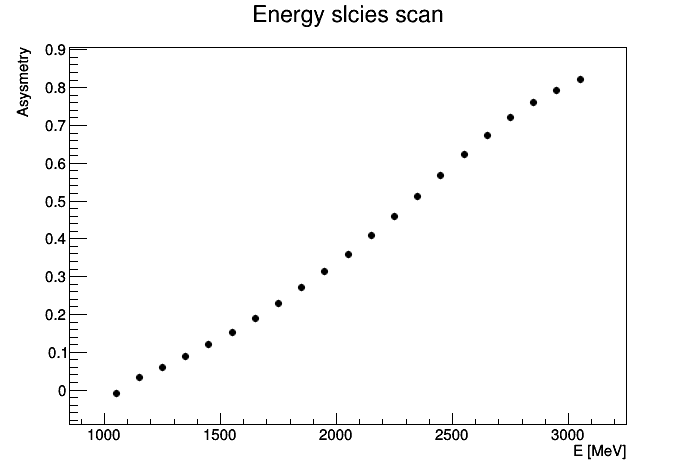

In [53]:
# A-method wiggle for energy threshold scan
f_EScan = R.TFile('/Users/cheng/workspace/TestCMake_fitter/run/slices_scan_10pars.root')

ays = []
graph = R.TGraphErrors()
for n in range(1000,3100,100):
    func = f_EScan.Get('func_10paras_cbo_lost_E%s_%s'%(n,n+100))
    
    a_v = func.GetParameter(2)    
    a_e = func.GetParError(2)
    ays.append(a_v)
    N = graph.GetN()
    graph.SetPoint(N,n+50,a_v)
    graph.SetPointError(N,0,a_e)
    

c = R.TCanvas()

graph.SetMarkerSize(0.9)
graph.SetLineStyle(1)
graph.SetLineWidth(1)
graph.SetMarkerStyle(8)
graph.SetTitle('Energy slcies scan;E [MeV];Asysmetry')
graph.Draw('AP')

c.Draw()

In [55]:
corr_all_A = corr_all.Clone()
Nx = corr_all_A.GetXaxis().GetNbins()
Ny = corr_all_A.GetYaxis().GetNbins()
for nx in range(Nx):
    for ny in range(Ny):
        v = corr_all_A.GetBinContent(nx+1,ny+1)
        e = corr_all_A.GetBinError(nx+1,ny+1)
        energy = corr_all_A.GetYaxis().GetBinCenter(ny+1)
        if energy<1000:
            v_new = 0.
            v_


